<a href="https://colab.research.google.com/github/Cham0703/DU_AN_SPAM/blob/main/main_email_detechtion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Code 1

ƒê√£ ƒëo√°n encoding: Windows-1252
S·ªë l∆∞·ª£ng ham/spam:
label
ham     4825
spam     747
Name: count, dtype: int64


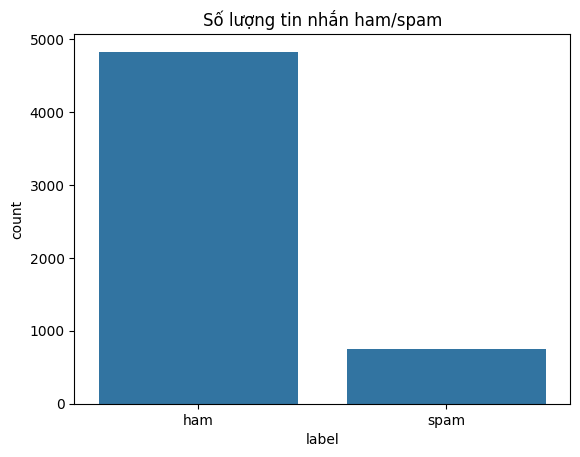

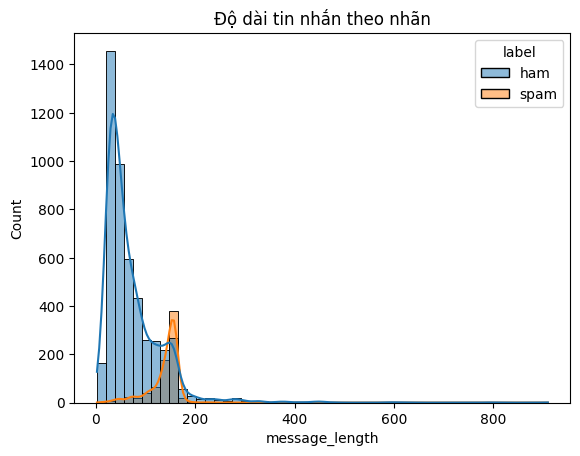

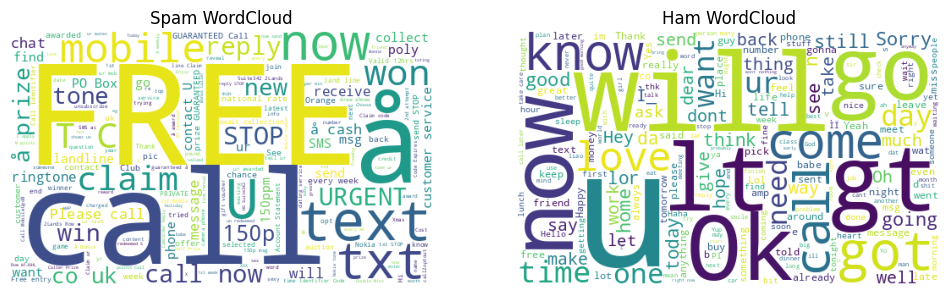

  label                                    cleaned_message
0   ham  go jurong point crazy available bugis n great ...
1   ham                            ok lar joking wif u oni
2  spam  free entry wkly comp win fa cup final tkts st ...
3   ham                u dun say early hor u c already say
4   ham        nah dont think goes usf lives around though


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import chardet
from wordcloud import WordCloud
import re
import nltk
from nltk.corpus import stopwords
# üßæ B∆Ø·ªöC 1: ƒê·ªçc file t·ª´ ·ªï ƒëƒ©a
duong_dan = "spam.csv"
# T·ª± ƒë·ªông ph√°t hi·ªán encoding c·ªßa file ƒë·ªÉ tr√°nh l·ªói khi ƒë·ªçc (m√°y tui b·ªã l·ªói f8 n√™n tui ch·∫°y chu·∫©n ƒëo√°n cho ch·∫Øc )
with open(duong_dan, "rb") as f:
    result = chardet.detect(f.read(10000))  # ƒê·ªçc th·ª≠ 10.000 byte
    encoding = result['encoding']
    print(f"ƒê√£ ƒëo√°n encoding: {encoding}")
# ƒê·ªçc d·ªØ li·ªáu v√† chu·∫©n h√≥a c·ªôt
df = pd.read_csv(duong_dan, encoding=encoding)
df = df[['v1', 'v2']]                    # L·∫•y 2 c·ªôt c·∫ßn thi·∫øt
df.columns = ['label', 'message']       # ƒê·∫∑t t√™n c·ªôt r√µ r√†ng
# üìä B∆Ø·ªöC 2: Kh√°m ph√° d·ªØ li·ªáu (EDA)
# Th·ªëng k√™ s·ªë l∆∞·ª£ng ham/spam
print("S·ªë l∆∞·ª£ng ham/spam:")
print(df['label'].value_counts())
# V·∫Ω bi·ªÉu ƒë·ªì c·ªôt s·ªë l∆∞·ª£ng
sns.countplot(data=df, x='label')
plt.title("S·ªë l∆∞·ª£ng tin nh·∫Øn ham/spam")
plt.show()
# T√≠nh ƒë·ªô d√†i tin nh·∫Øn
df['message_length'] = df['message'].apply(len)
# V·∫Ω bi·ªÉu ƒë·ªì ph√¢n b·ªë ƒë·ªô d√†i tin nh·∫Øn
sns.histplot(data=df, x='message_length', hue='label', bins=50, kde=True)
plt.title("ƒê·ªô d√†i tin nh·∫Øn theo nh√£n")
plt.show()
# ‚òÅÔ∏è B∆Ø·ªöC 3: T·∫°o WordCloud
spam_text = ' '.join(df[df['label'] == 'spam']['message'])
ham_text = ' '.join(df[df['label'] == 'ham']['message'])
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.imshow(WordCloud(width=500, height=300, background_color='white').generate(spam_text))
plt.axis("off")
plt.title("Spam WordCloud")
plt.subplot(1, 2, 2)
plt.imshow(WordCloud(width=500, height=300, background_color='white').generate(ham_text))
plt.axis("off")
plt.title("Ham WordCloud")
plt.show()
# üßπ B∆Ø·ªöC 4: L√†m s·∫°ch tin nh·∫Øn
# ƒê∆∞·ªùng d·∫´n ƒë·∫øn file spam.csv c·ªßa b·∫°n
duong_dan = "spam.csv"
# Ph√°t hi·ªán encoding ƒë·ªÉ tr√°nh l·ªói Unicode
with open(duong_dan, "rb") as f:
    encoding = chardet.detect(f.read())['encoding']
# ƒê·ªçc d·ªØ li·ªáu v√† ƒë·ªïi t√™n c·ªôt
df = pd.read_csv(duong_dan, encoding=encoding)[['v1', 'v2']]
df.columns = ['label', 'message']
# T·∫£i stopwords n·∫øu ch∆∞a c√≥
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
# H√†m l√†m s·∫°ch vƒÉn b·∫£n
def clean_message(msg):
    msg = msg.lower()                              # Chuy·ªÉn sang ch·ªØ th∆∞·ªùng
    msg = re.sub(r'\d+', '', msg)                 # Xo√° ch·ªØ s·ªë
    msg = re.sub(r'[^\w\s]', '', msg)             # Xo√° d·∫•u c√¢u
    words = msg.split()                           # T√°ch t·ª´
    words = [w for w in words if w not in stop_words]  # B·ªè stop words
    return ' '.join(words)
# T·∫°o c·ªôt m·ªõi ch·ª©a tin nh·∫Øn ƒë√£ l√†m s·∫°ch
df['cleaned_message'] = df['message'].apply(clean_message)
# Ch·ªâ gi·ªØ l·∫°i hai c·ªôt y√™u c·∫ßu: nh√£n v√† tin nh·∫Øn ƒë√£ l√†m s·∫°ch
df_output = df[['label', 'cleaned_message']]
# Hi·ªÉn th·ªã 5 d√≤ng ƒë·∫ßu ƒë·ªÉ ki·ªÉm tra
print(df_output.head())

Code 2

In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

duong_dan = "spam.csv"

# B∆Ø·ªöC 1: Chuy·ªÉn ƒë·ªïi nh√£n sang d·∫°ng s·ªë
# Chuy·ªÉn 'ham' th√†nh 0, 'spam' th√†nh 1
df['label_num'] = df['label'].map({'ham': 0, 'spam': 1})

# In ra ƒë·ªÉ ki·ªÉm tra
print("S·ªë l∆∞·ª£ng m·∫´u theo nh√£n s·ªë:")
print(df['label_num'].value_counts())

# B∆Ø·ªöC 2: Chuy·ªÉn ƒë·ªïi tin nh·∫Øn th√†nh ƒë·∫∑c tr∆∞ng s·ªë
# S·ª≠ d·ª•ng CountVectorizer (M√¥ h√¨nh Bag of Words)
count_vectorizer = CountVectorizer(max_features=5000)  # Gi·ªõi h·∫°n 5000 t·ª´ ph·ªï bi·∫øn nh·∫•t
X_count = count_vectorizer.fit_transform(df['cleaned_message'])

# S·ª≠ d·ª•ng TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(df['cleaned_message'])

# In ra k√≠ch th∆∞·ªõc c·ªßa d·ªØ li·ªáu sau khi chuy·ªÉn ƒë·ªïi
print(f"K√≠ch th∆∞·ªõc d·ªØ li·ªáu CountVectorizer: {X_count.shape}")
print(f"K√≠ch th∆∞·ªõc d·ªØ li·ªáu TF-IDF: {X_tfidf.shape}")

# B∆Ø·ªöC 3: Chia d·ªØ li·ªáu th√†nh t·∫≠p hu·∫•n luy·ªán v√† t·∫≠p ki·ªÉm tra
# S·ª≠ d·ª•ng c·∫£ hai lo·∫°i ƒë·∫∑c tr∆∞ng ƒë·ªÉ so s√°nh
# S·ª≠ d·ª•ng CountVectorizer
X_count_train, X_count_test, y_count_train, y_count_test = train_test_split(
    X_count, df['label_num'], test_size=0.2, random_state=42, stratify=df['label_num']
)

# S·ª≠ d·ª•ng TF-IDF
X_tfidf_train, X_tfidf_test, y_tfidf_train, y_tfidf_test = train_test_split(
    X_tfidf, df['label_num'], test_size=0.2, random_state=42, stratify=df['label_num']
)

# B∆Ø·ªöC 4: L∆∞u t·ª´ v·ª±ng ƒë·ªÉ s·ª≠ d·ª•ng sau n√†y
count_vocab = count_vectorizer.get_feature_names_out()
tfidf_vocab = tfidf_vectorizer.get_feature_names_out()

# In ra th√¥ng tin v·ªÅ t·∫≠p hu·∫•n luy·ªán v√† ki·ªÉm tra
print("\nTh√¥ng tin v·ªÅ b·ªô d·ªØ li·ªáu ƒë√£ chia:")
print(f"S·ªë l∆∞·ª£ng m·∫´u hu·∫•n luy·ªán: {X_count_train.shape[0]}")
print(f"S·ªë l∆∞·ª£ng m·∫´u ki·ªÉm tra: {X_count_test.shape[0]}")
print(f"T·ª∑ l·ªá spam trong t·∫≠p hu·∫•n luy·ªán: {y_count_train.mean()*100:.2f}%")
print(f"T·ª∑ l·ªá spam trong t·∫≠p ki·ªÉm tra: {y_count_test.mean()*100:.2f}%")


output_summary = {
    'CountVectorizer': {
        'X_train shape': X_count_train.shape,
        'X_test shape': X_count_test.shape,
        'y_train shape': y_count_train.shape,
        'y_test shape': y_count_test.shape,
        'vocabulary size': len(count_vocab)
    },
    'TfidfVectorizer': {
        'X_train shape': X_tfidf_train.shape,
        'X_test shape': X_tfidf_test.shape,
        'y_train shape': y_tfidf_train.shape,
        'y_test shape': y_tfidf_test.shape,
        'vocabulary size': len(tfidf_vocab)
    }
}

print("\nT·ªïng k·∫øt:")
for method, details in output_summary.items():
    print(f"\n{method}:")
    for key, value in details.items():
        print(f"  - {key}: {value}")

S·ªë l∆∞·ª£ng m·∫´u theo nh√£n s·ªë:
label_num
0    4825
1     747
Name: count, dtype: int64
K√≠ch th∆∞·ªõc d·ªØ li·ªáu CountVectorizer: (5572, 5000)
K√≠ch th∆∞·ªõc d·ªØ li·ªáu TF-IDF: (5572, 5000)

Th√¥ng tin v·ªÅ b·ªô d·ªØ li·ªáu ƒë√£ chia:
S·ªë l∆∞·ª£ng m·∫´u hu·∫•n luy·ªán: 4457
S·ªë l∆∞·ª£ng m·∫´u ki·ªÉm tra: 1115
T·ª∑ l·ªá spam trong t·∫≠p hu·∫•n luy·ªán: 13.42%
T·ª∑ l·ªá spam trong t·∫≠p ki·ªÉm tra: 13.36%

T·ªïng k·∫øt:

CountVectorizer:
  - X_train shape: (4457, 5000)
  - X_test shape: (1115, 5000)
  - y_train shape: (4457,)
  - y_test shape: (1115,)
  - vocabulary size: 5000

TfidfVectorizer:
  - X_train shape: (4457, 5000)
  - X_test shape: (1115, 5000)
  - y_train shape: (4457,)
  - y_test shape: (1115,)
  - vocabulary size: 5000


Coder 3

In [16]:
#imports chung
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns

#imports model
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb

#import pickle l∆∞u model
import pickle

Model v√† ƒë√°nh gi√°

In [17]:
models = {
    'MultinomialNB': MultinomialNB(),
    'LogisticRegression': LogisticRegression(max_iter=1000),
    'SVM': SVC(kernel='linear', probability=True),
    'DecisionTree': DecisionTreeClassifier(),
    'RandomForest': RandomForestClassifier(n_estimators=100),
    'KNN': KNeighborsClassifier(),
    'AdaBoost': AdaBoostClassifier(n_estimators=50),
    'Bagging': BaggingClassifier(n_estimators=50),
    'ExtraTrees': ExtraTreesClassifier(n_estimators=100),
    'GradientBoosting': GradientBoostingClassifier(n_estimators=100),
    'XGBoost': xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

def evaluate_model(name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return {'Model':name, 'Accuracy':acc, 'Precision':prec, 'Recall':rec, 'F1-score':f1}

Hu·∫©n luy·ªán v√† ƒë√°nh gi√° tr√™n Count v√† TF-IDF

In [18]:
results = []

for feat_name, (X_train, X_test, y_train, y_test) in {
    'Count':(X_count_train, X_count_test, y_count_train, y_count_test),
    'TF-IDF':(X_tfidf_train, X_tfidf_test, y_tfidf_train, y_tfidf_test)
}.items():
    print(f"ƒê√°nh gi√° v·ªõi ƒë·∫∑c tr∆∞ng: {feat_name}")
    for name, model in models.items():
        model.fit(X_train, y_train)
        res=evaluate_model(name, model, X_test, y_test)
        res['Feature']=feat_name
        results.append(res)

df_results=pd.DataFrame(results)
df_results


ƒê√°nh gi√° v·ªõi ƒë·∫∑c tr∆∞ng: Count


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:57:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


ƒê√°nh gi√° v·ªõi ƒë·∫∑c tr∆∞ng: TF-IDF


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:57:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Model  Accuracy  Precision    Recall  F1-score Feature
0        MultinomialNB  0.974888   0.917241  0.892617  0.904762   Count
1   LogisticRegression  0.981166   1.000000  0.859060  0.924188   Count
2                  SVM  0.984753   0.992537  0.892617  0.939929   Count
3         DecisionTree  0.961435   0.878571  0.825503  0.851211   Count
4         RandomForest  0.976682   0.992000  0.832215  0.905109   Count
5                  KNN  0.923767   1.000000  0.429530  0.600939   Count
6             AdaBoost  0.923767   0.775862  0.604027  0.679245   Count
7              Bagging  0.969507   0.938931  0.825503  0.878571   Count
8           ExtraTrees  0.978475   1.000000  0.838926  0.912409   Count
9     GradientBoosting  0.961435   0.964912  0.738255  0.836502   Count
10             XGBoost  0.972197   0.975806  0.812081  0.886447   Count
11       MultinomialNB  0.966816   0.991228  0.758389  0.859316  TF-IDF
12  LogisticRegression  0.959641   0.990566  0.704698  0.823529  TF-IDF
13                 SVM  0.983857   1.000000  0.879195  0.935714  TF-IDF
14        DecisionTree  0.953363   0.834483  0.812081  0.823129  TF-IDF
15        RandomForest  0.974888   0.984000  0.825503  0.897810  TF-IDF
16                 KNN  0.918386   1.000000  0.389262  0.560386  TF-IDF
17            AdaBoost  0.938117   0.934783  0.577181  0.713693  TF-IDF
18             Bagging  0.963229   0.915385  0.798658  0.853047  TF-IDF
19          ExtraTrees  0.975785   0.991935  0.825503  0.901099  TF-IDF
20    GradientBoosting  0.961435   0.949153  0.751678  0.838951  TF-IDF
21             XGBoost  0.973991   0.976190  0.825503  0.894545  TF-IDF

So s√°nh k·∫øt qu·∫£ v√† ch·ªçn model


Top 5 m√¥ h√¨nh tr√™n Count theo F1-score:


Model  Accuracy  Precision    Recall  F1-score
2                 SVM  0.984753   0.992537  0.892617  0.939929
1  LogisticRegression  0.981166   1.000000  0.859060  0.924188
8          ExtraTrees  0.978475   1.000000  0.838926  0.912409
4        RandomForest  0.976682   0.992000  0.832215  0.905109
0       MultinomialNB  0.974888   0.917241  0.892617  0.904762

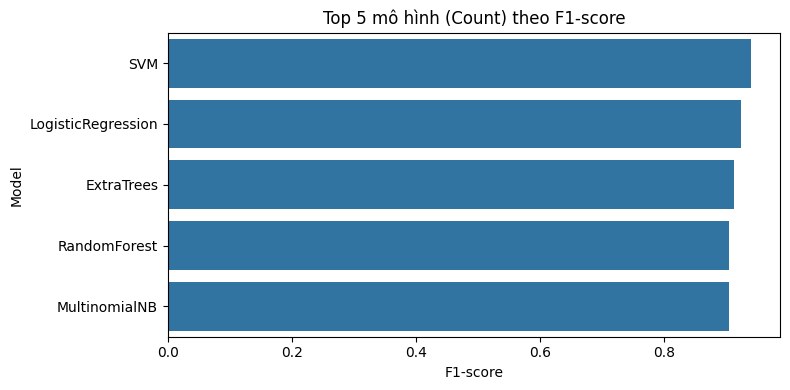


Top 5 m√¥ h√¨nh tr√™n TF-IDF theo F1-score:


Model  Accuracy  Precision    Recall  F1-score
13            SVM  0.983857   1.000000  0.879195  0.935714
19     ExtraTrees  0.975785   0.991935  0.825503  0.901099
15   RandomForest  0.974888   0.984000  0.825503  0.897810
21        XGBoost  0.973991   0.976190  0.825503  0.894545
11  MultinomialNB  0.966816   0.991228  0.758389  0.859316

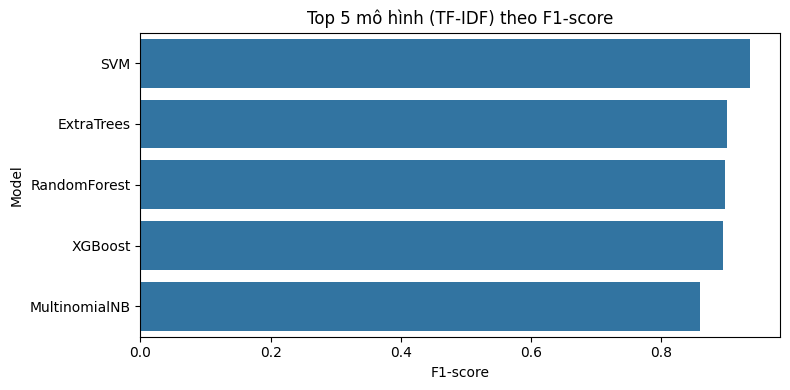

In [19]:
for feat in ['Count', 'TF-IDF']:
    df_feat=df_results[df_results['Feature']==feat]
    #l·∫•y top 5 theo F1-score
    top5=df_feat.sort_values('F1-score', ascending=False).head(5)
    #Th·ªÉ hi·ªán bi·ªÉu ƒë·ªì
    print(f"\nTop 5 m√¥ h√¨nh tr√™n {feat} theo F1-score:")
    display(top5[['Model','Accuracy','Precision','Recall','F1-score']])
    # V·∫Ω barplot F1-score
    plt.figure(figsize=(8,4))
    sns.barplot(data=top5, x='F1-score', y='Model')
    plt.title(f"Top 5 m√¥ h√¨nh ({feat}) theo F1-score")
    plt.xlabel("F1-score")
    plt.ylabel("Model")
    plt.tight_layout()
    plt.show()


Confusion Matrix cho model t·ªët nh·∫•t

Model t·ªët nh·∫•t chung: SVM tr√™n Count (F1=0.9399)


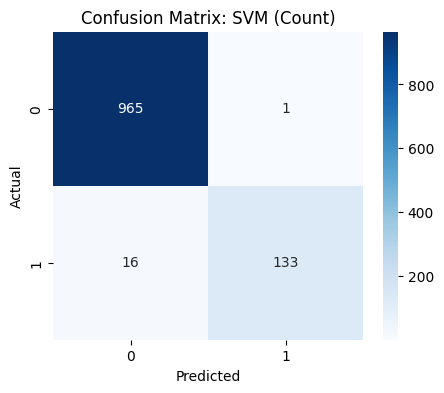

In [20]:
#l·∫•y d·ªØ li·ªáu t·ª´ Count v√† TF-IDF
best_row_all=df_results.sort_values('F1-score', ascending=False).iloc[0]
feat = best_row_all['Feature']
model_name=best_row_all['Model']
print(f"Model t·ªët nh·∫•t chung: {model_name} tr√™n {feat} (F1={best_row_all['F1-score']:.4f})")

best_model=models[model_name]

#l·∫•y t·∫≠p train/test
if feat=='TF-IDF':
    X_tr, X_te, y_tr, y_te = X_tfidf_train, X_tfidf_test, y_tfidf_train, y_tfidf_test
else:
    X_tr, X_te, y_tr, y_te = X_count_train, X_count_test, y_count_train, y_count_test

best_model.fit(X_tr, y_tr)
y_pred=best_model.predict(X_te)

cm=confusion_matrix(y_te, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix: {model_name} ({feat})')
plt.show()


L∆∞u l·∫°i Model

In [21]:
with open('best_spam_model.pkl','wb') as f:
    pickle.dump({
        'model': best_model,
        'vectorizer': tfidf_vectorizer
    }, f)
print("ƒê√£ l∆∞u model v√† vectorizer v√†o best_spam_model.pkl")


ƒê√£ l∆∞u model v√† vectorizer v√†o best_spam_model.pkl
